In [326]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from scipy.stats import norm

In [328]:
class logit:

    def __init__(self,X_train,y_train,X_test,y_test, learning_rate = 0.00001, tol = 0.00005, maxIter = 50000, index = []):

        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.tol = tol
        self.maxIter = maxIter
        self.error = []
        self.iter_count = []
        self.index = index

    def addBias(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

    def sigmoid(self,Z):
        sig = 1 / (1+np.exp(-Z))
        return sig

    def costFunction(self,X,y):

        pred_ =  np.log(np.ones(X.shape[0]) +np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred_.sum()
        return cost

    def gradient(self,X,y):
        sigmoid = self.sigmoid(X.dot(self.w))
        grad = (sigmoid - y).dot(X)
        return grad

    def gradientDescent(self,X,y):
        prev_error = float('inf')
        for i in tqdm(range(self.maxIter)):
            self.w = self.w - self.learning_rate * self.gradient(X,y)
            curr = self.costFunction(X,y)
            diff = prev_error - curr
            prev_error= curr

            if abs(diff) < self.tol:
                print("stopped")
                break
        #plot function 
        
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def evaluate(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        
        accuracy = (y==y_hat).sum() / y.size
        precision = (y&y_hat).sum() / y_hat.sum()
        recall = (y&y_hat).sum() / y.sum()
        
        return recall, precision, accuracy
    
    def remove_index(self):
        for index in self.index:
            self.X_train = np.delete(self.X_train,index, axis = 0)
            #print(self.X_train.shape)
            self.y_train = np.delete(self.y_train,index, axis = 0)
            #print(self.y_train.shape)
        
        
    
    def fit(self):
        if self.X_train.shape[0] >= max(self.index, default = 0) and len(self.index) !=0 :
            self.remove_index()
            print('removed indexes')
            #print(self.X_train.shape)
        else:
            print("no record of the following index exists...")
        
        #self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y,test_size=0.3)
        print(self.X_train.shape)
        #print(self.y_train.shape)
        

        self.w = np.ones(self.X_train.shape[1], dtype=np.float64)*0
        
        self.gradientDescent(self.X_train,self.y_train)
        
        print(self.w)
        
        y_hat = self.predict(self.X_test)
        recall , precision, accuracy = self.evaluate(self.y_test, y_hat)
        
        print("accuracy:", accuracy)
        print("precision:", precision)
        print("recall:", recall)
        
    
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_test[:, 0], self.X_test[:, 1], 
                     self.sigmoid(self.X_test.dot(self.w)), 
                     c = self.y_test[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_test[:, 0], self.X_test[:, 1], 
                   c=self.y_test[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_test[:, 0], self.X_test[:, 1], 
                   c=self.y_test[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


        

In [329]:
train_df = pd.read_excel('C:/Users/sid31/Downloads/New folder/semester 2/machine learning/python exercises/python lab2/Lab3_data.xls',sheet_name = '2004--2005 Data')
test_df = pd.read_excel('C:/Users/sid31/Downloads/New folder/semester 2/machine learning/python exercises/python lab2/Lab3_data.xls', sheet_name = '2004--2007 Data')

In [330]:
train_df = train_df.values
test_df = test_df.values
X_train,y_train = train_df[:,1:], train_df[:,0]
X_test, y_test = test_df[:,1:], test_df[:,0]

In [331]:
lr = logit(X_train,y_train,X_test,y_test, index= [])

In [332]:
lr.fit()

no record of the following index exists...
(46, 2)


 11%|█         | 5274/50000 [00:00<00:01, 35117.56it/s]

stopped
[-0.48174298  0.23348372]
accuracy: 0.8947368421052632
precision: 0.9210526315789473
recall: 0.9459459459459459


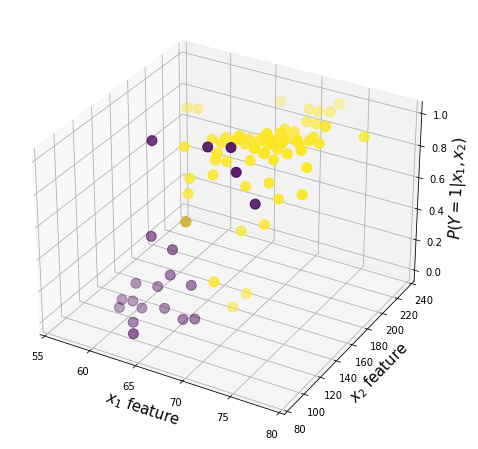

In [333]:
lr.plot()

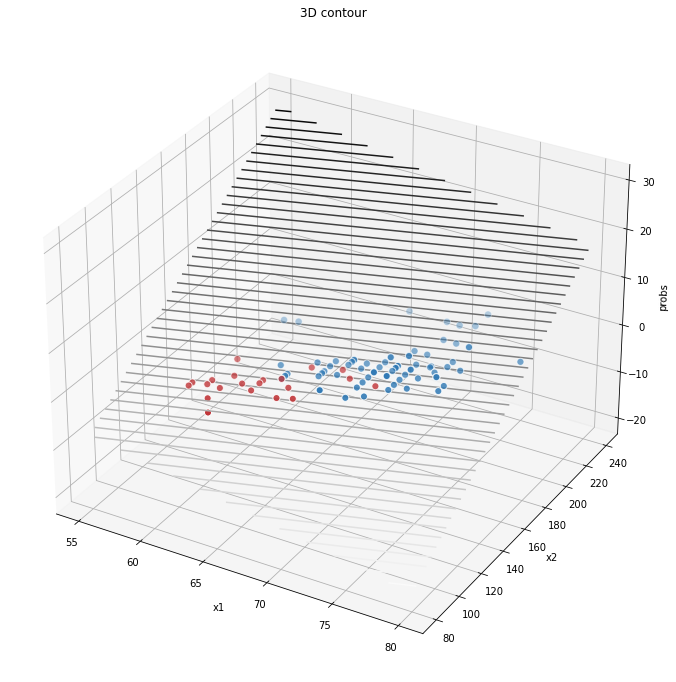

In [334]:
lr.plot3D()

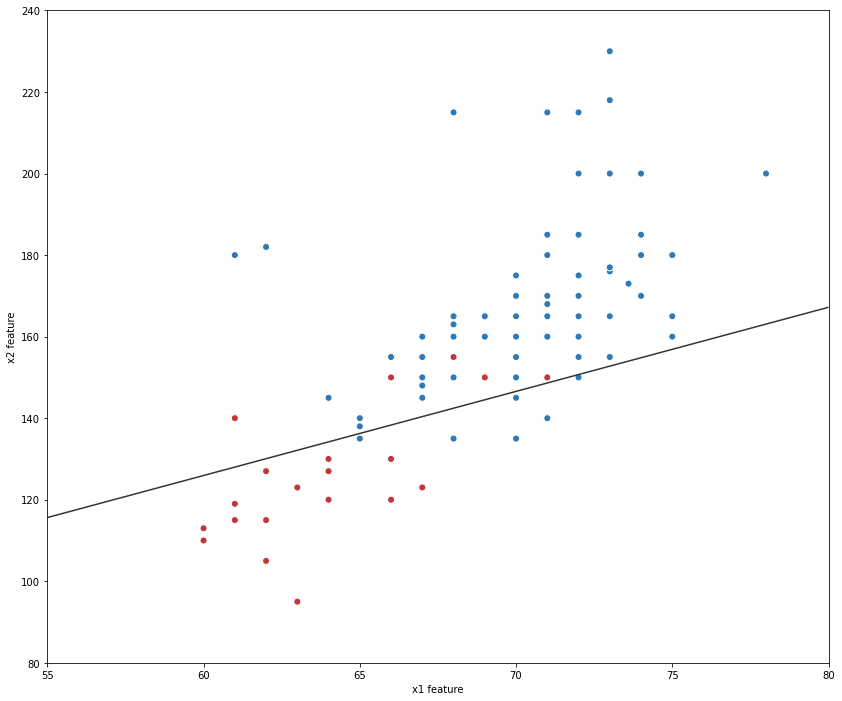

In [335]:
lr.scatterPlt()

In [336]:
lr1 = logit(X_train,y_train,X_test,y_test, index= [0,38])

In [337]:
lr1.fit()

removed indexes
(44, 2)


 19%|█▊        | 9367/50000 [00:00<00:01, 40053.59it/s]

stopped
[-0.67129844  0.31997644]
accuracy: 0.8736842105263158
precision: 0.9305555555555556
recall: 0.9054054054054054


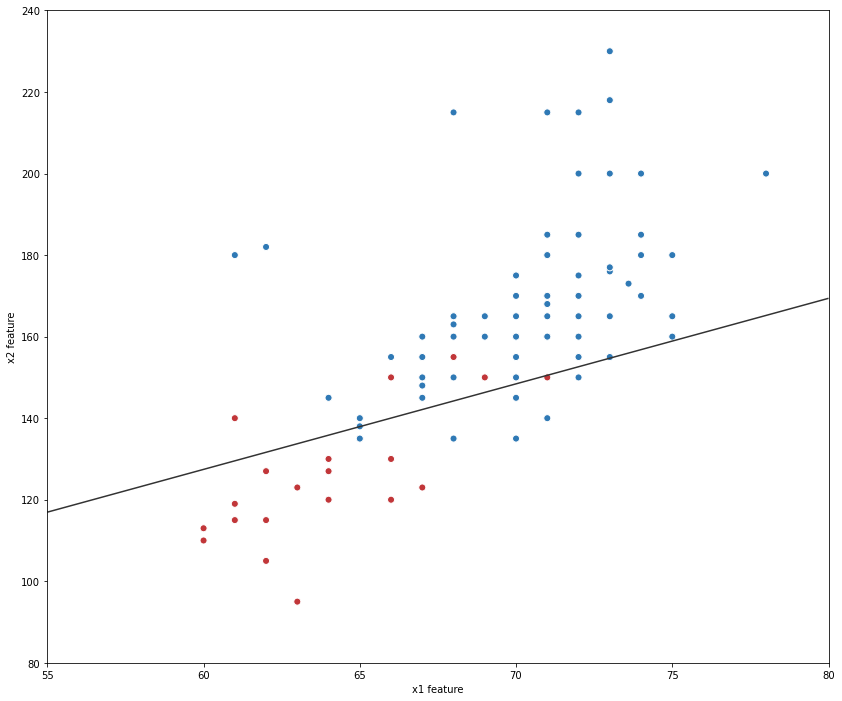

In [325]:
lr1.scatterPlt()

The points 0 and 38 makes the decision boundary classify the data points accurately because they are linearly seperable. and the points 0,38 may be outliers to the data set 

# naive bayes

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
#discrete
X = pd.DataFrame(np.random.randint(2, size = (1000,3)))
X = X.values
X,y = X[:,1:], X[:,0]

In [103]:
#contineous
X,y = make_blobs(n_samples = 10000, centers = 2 , n_features = 2, random_state=1)

In [327]:
class NaiveBayes:
    
    def __init__(self,X,y, smoothing_param, is_discrete,is_laplace):
        
        self.X = X
        self.y=y
        self.smoothing_param = smoothing_param
        self.is_laplace = is_laplace
        self.is_discrete = is_discrete
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y,random_state = 0, test_size = 0.3)

        
    def fit(self):
        
        self.class_0 = self.X_train[self.y_train == 0]
        self.class_1 = self.X_train[self.y_train == 1]
        
        self.class_0_prior = len(self.class_0) / len(self.X_train)
        self.class_1_prior = len(self.class_1) / len(self.X_train)
        
        self.num_features = self.X_train.shape[1]
        self.features = {}
        
        if self.is_discrete:
            print("using discrete naive bayes...")
            for i in range(self.num_features):

                self.features['X' + str(i)+ '00'] = (( self.class_0[self.class_0[:,i]==0]).sum()) /  len(self.class_0) 
                self.features['X' + str(i)+ '10'] = (( self.class_0[self.class_0[:,i]==1]).sum()) /  len(self.class_0) 

                self.features['X' + str(i)+ '01'] = (( self.class_1[self.class_1[:,i]==0]).sum()) /  len(self.class_1) 
                self.features['X' + str(i)+ '11'] = (( self.class_1[self.class_1[:,i]==1]).sum()) /  len(self.class_1) 
                
        else:
            print("using contineous naive bayes...")
            for i in range(self.num_features):
                
                self.features['X'+str(i)+'0'] = self.fit_dist(self.class_0[:,i])
                self.features['X'+str(i)+'1'] = self.fit_dist(self.class_1[:,i])
            
            
        
    def fit_dist(self,data):
        mu = np.mean(data)
        sigma = np.std(data)
        
        dist = norm(mu, sigma)
        return dist
        
        
    def laplaceSmoothing(self, class_0, class_1):
        
        smooth_0 = class_0 + self.smoothing_param / ( len(self.class_0) + ( self.smoothing_param * self.num_features) )
        smooth_1 = class_1 + self.smoothing_param / ( len(self.class_1) + ( self.smoothing_param * self.num_features) )
        
        return smooth_0, smooth_1
        

    def evaluate(self,y,y_hat):
        print(confusion_matrix(y, y_hat))
        y = (y==1)
        y_hat = (y_hat==1)

        accuracy = (y==y_hat).sum() / y.size
        #precision = (y&y_hat).sum() / y_hat.sum()
        #recall = (y&y_hat).sum() / y.sum()
        
        print("Accuracy: ", accuracy)
        #print("precision: ", precision)
        #print("recall :", recall)
        
        
    def prob(self,sample):
        
        #num_features= sample.shape[1]
        py0=1
        py1=1
        
        
        if self.is_discrete:

            for p in range(self.num_features):
                py0 *= self.features['X'+str(p)+ str(sample[p])+'0'] 
                py1 *= self.features['X'+str(p)+ str(sample[p])+'1'] 

        else: 
            for p in range(self.num_features):
                py0 *= self.features['X'+str(p)+'0'].pdf(sample[p])
                py1 *= self.features['X'+str(p)+'1'].pdf(sample[p])
            
        return py0*self.class_0_prior , py1*self.class_1_prior

    def laplace_prob(self,sample):
        py0 =1
        py1 =1
        if self.is_discrete:
            for p in range(self.num_features):
                smooth_0, smooth_1 = self.laplaceSmoothing(self.features['X'+str(p)+ str(sample[p])+'0'] ,self.features['X'+str(p)+ str(sample[p])+'1'])
                py0 *= smooth_0
                py1 *= smooth_1
        else:
            for p in range(self.num_features):
                pdf_0 = self.features['X'+str(p)+'0'].pdf(sample[p])
                pdf_1 = self.features['X'+str(p)+'1'].pdf(sample[p])
                smooth_0, smooth_1 = self.laplaceSmoothing(pdf_0,pdf_1)
                py0 *= smooth_0
                py1 *= smooth_1
                
        return py0*self.class_0_prior , py1*self.class_1_prior
            
            
    def predict(self):
        self.predictions = []
        for sample, target in zip(self.X_test, self.y_test):
            
            if self.is_laplace:
                py0, py1 = self.laplace_prob(sample)
            else:
                py0 ,py1 = self.prob(sample)
            #print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            #print('p(y=1 | %s) = %.3f' % (sample, py1*100))
            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100]), target))
            self.predictions.append(np.argmax([py0*100,py1*100]))
            
        self.evaluate(self.y_test, self.predictions)
            
            
        
            
            

In [125]:
nb = NaiveBayes(X,y,smoothing_param=0.5 ,is_discrete = True,is_laplace = True)
nb.fit()
nb.predict()

using discrete naive bayes...
model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 1 

model predicted class 1 and the truth was 0 

model predicted class 1 and the truth was 0 

mode

In [20]:
..

0
1
